In [57]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy
from scipy.optimize import curve_fit
import glob
import os
%matplotlib widget

In [58]:
master = pd.read_table('combined.txt')

In [102]:
def func(x, a, b, c):
    return a *np.exp(b*(x-c))

temps = master['Temperature (K)'].values[np.where(master['Temperature (K)'].values < 6.4)]
volts = master['Voltage (mV)'].values[np.where(master['Temperature (K)'].values < 6.4)]

(a,b,c), pcov = curve_fit(func,temps,volts,maxfev=5000)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
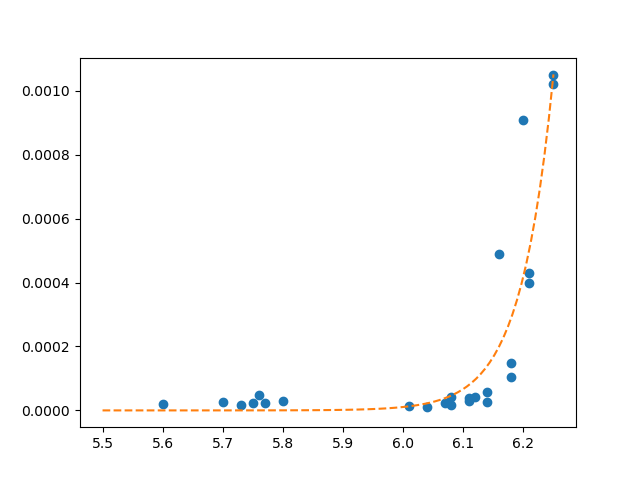

In [103]:

plt.figure()
plt.plot(temps, volts,'o')

x = np.linspace(5.5,max(temps),100)
plt.plot(x,func(x,a,b,c),'--')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
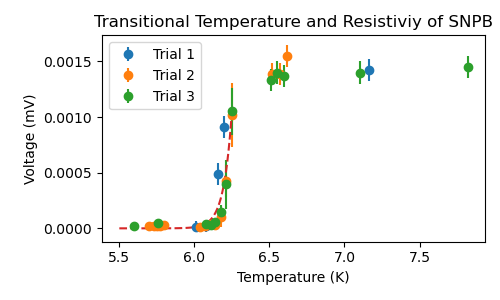

In [104]:
files = glob.glob('resistivity*.txt')
plt.figure(figsize=(5,3))
plt.xlabel('Temperature (K)')
plt.ylabel('Voltage (mV)')
plt.title('Transitional Temperature and Resistiviy of SNPB')
for f in files:
    df = pd.read_table(f)
    trial = f.split('-')[1].split('.')[0]
    plt.errorbar(df['Temperature (K)'],df['Voltage (mV)'],yerr=df['Voltage Error'],fmt='o',label='Trial '+trial)
plt.tight_layout()
plt.legend()
plt.plot(x,func(x,a,b,c),'--')

In [105]:
a,b,c

(2.546843982388831, 18.358497895006085, 6.6744764379684485)

In [106]:
master

,Temperature (K),Voltage (mV),Voltage Error,Phase (deg)
0,7.16,0.001420,0.000100,-105.8
1,6.20,0.000910,0.000100,-106.3
2,6.16,0.000490,0.000100,-106.4
3,6.12,0.000041,0.000050,-10.6
4,6.08,0.000017,0.000050,21.3
5,6.01,0.000014,0.000050,-15.6
6,6.62,0.001550,0.000100,-106.4
7,6.57,0.001390,0.000100,-109.0
8,6.52,0.001390,0.000100,-107.6
9,6.25,0.001020,0.000288,-109.9


In [107]:
np.where(master['Voltage (mV)'].values < 6.4)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
       dtype=int64),)